A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [ ]:
#Understand data
#load data
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
media=pd.read_csv("/content/drive/MyDrive/Data Sets/mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [ ]:
#Exploratory data analysis
#drop column
media=media.drop("Unnamed: 7",axis=1)

In [ ]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [ ]:
#convert date into panda date format
media['Date']=pd.to_datetime(media['Date'])

In [ ]:
#days = current date - begining date
from datetime import date
d0=date(2017,2,28)
d1=media.Date
days=pd.to_datetime(d1).dt.date-d0
print(type(d1))
media['Day']=days
media.head()


<class 'pandas.core.series.Series'>


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [ ]:
#Conversion string into int
media['Day']=media['Day'].astype(str)
media['Day']=media['Day'].map(lambda x:x[0:2])
media['Day']=media['Day'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


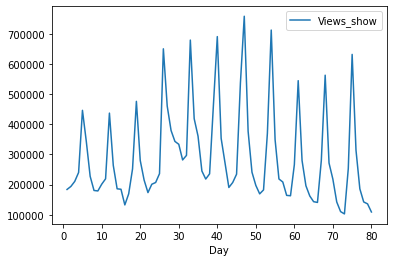

In [ ]:
import matplotlib.pyplot as plt
media.plot.line(x='Day',y='Views_show')

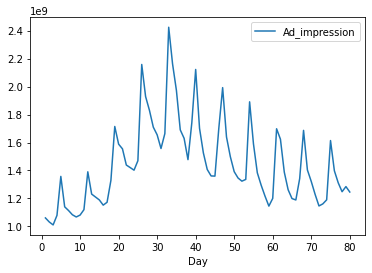

In [ ]:
media.plot.line(x='Day',y='Ad_impression')

In [ ]:
media['Day_of_week']=media['Date'].dt.dayofweek
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6


In [ ]:
#built in - Day of week - 0 is Mon, 1 is Tues ....
#1 for Sun, 2 for Mon....
media['wkday']=(media['Day']+3)%7
media.wkday.replace(0,7, inplace=True)
media['wkday']=media['wkday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,Day_of_week,wkday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,1


In [ ]:
(media['Day']+3)%7

0     4
1     5
2     6
3     0
4     1
     ..
75    2
76    3
77    4
78    5
79    6
Name: Day, Length: 80, dtype: int64

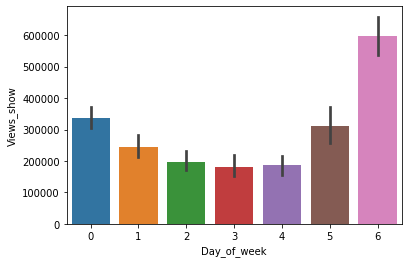

In [ ]:
import seaborn as sns
sns.barplot(data=media,x='Day_of_week', y='Views_show')

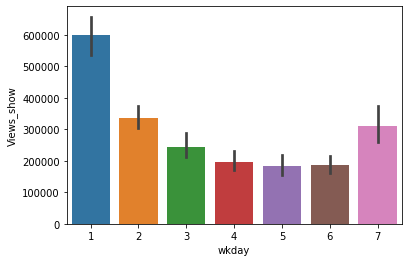

In [ ]:
sns.barplot(data=media,x='wkday', y='Views_show')

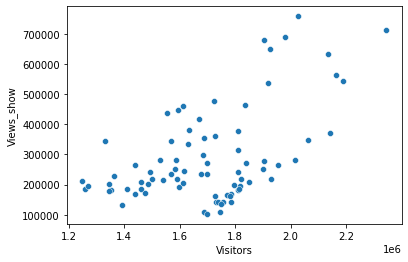

In [ ]:
sns.scatterplot(data=media, x='Visitors',y='Views_show')

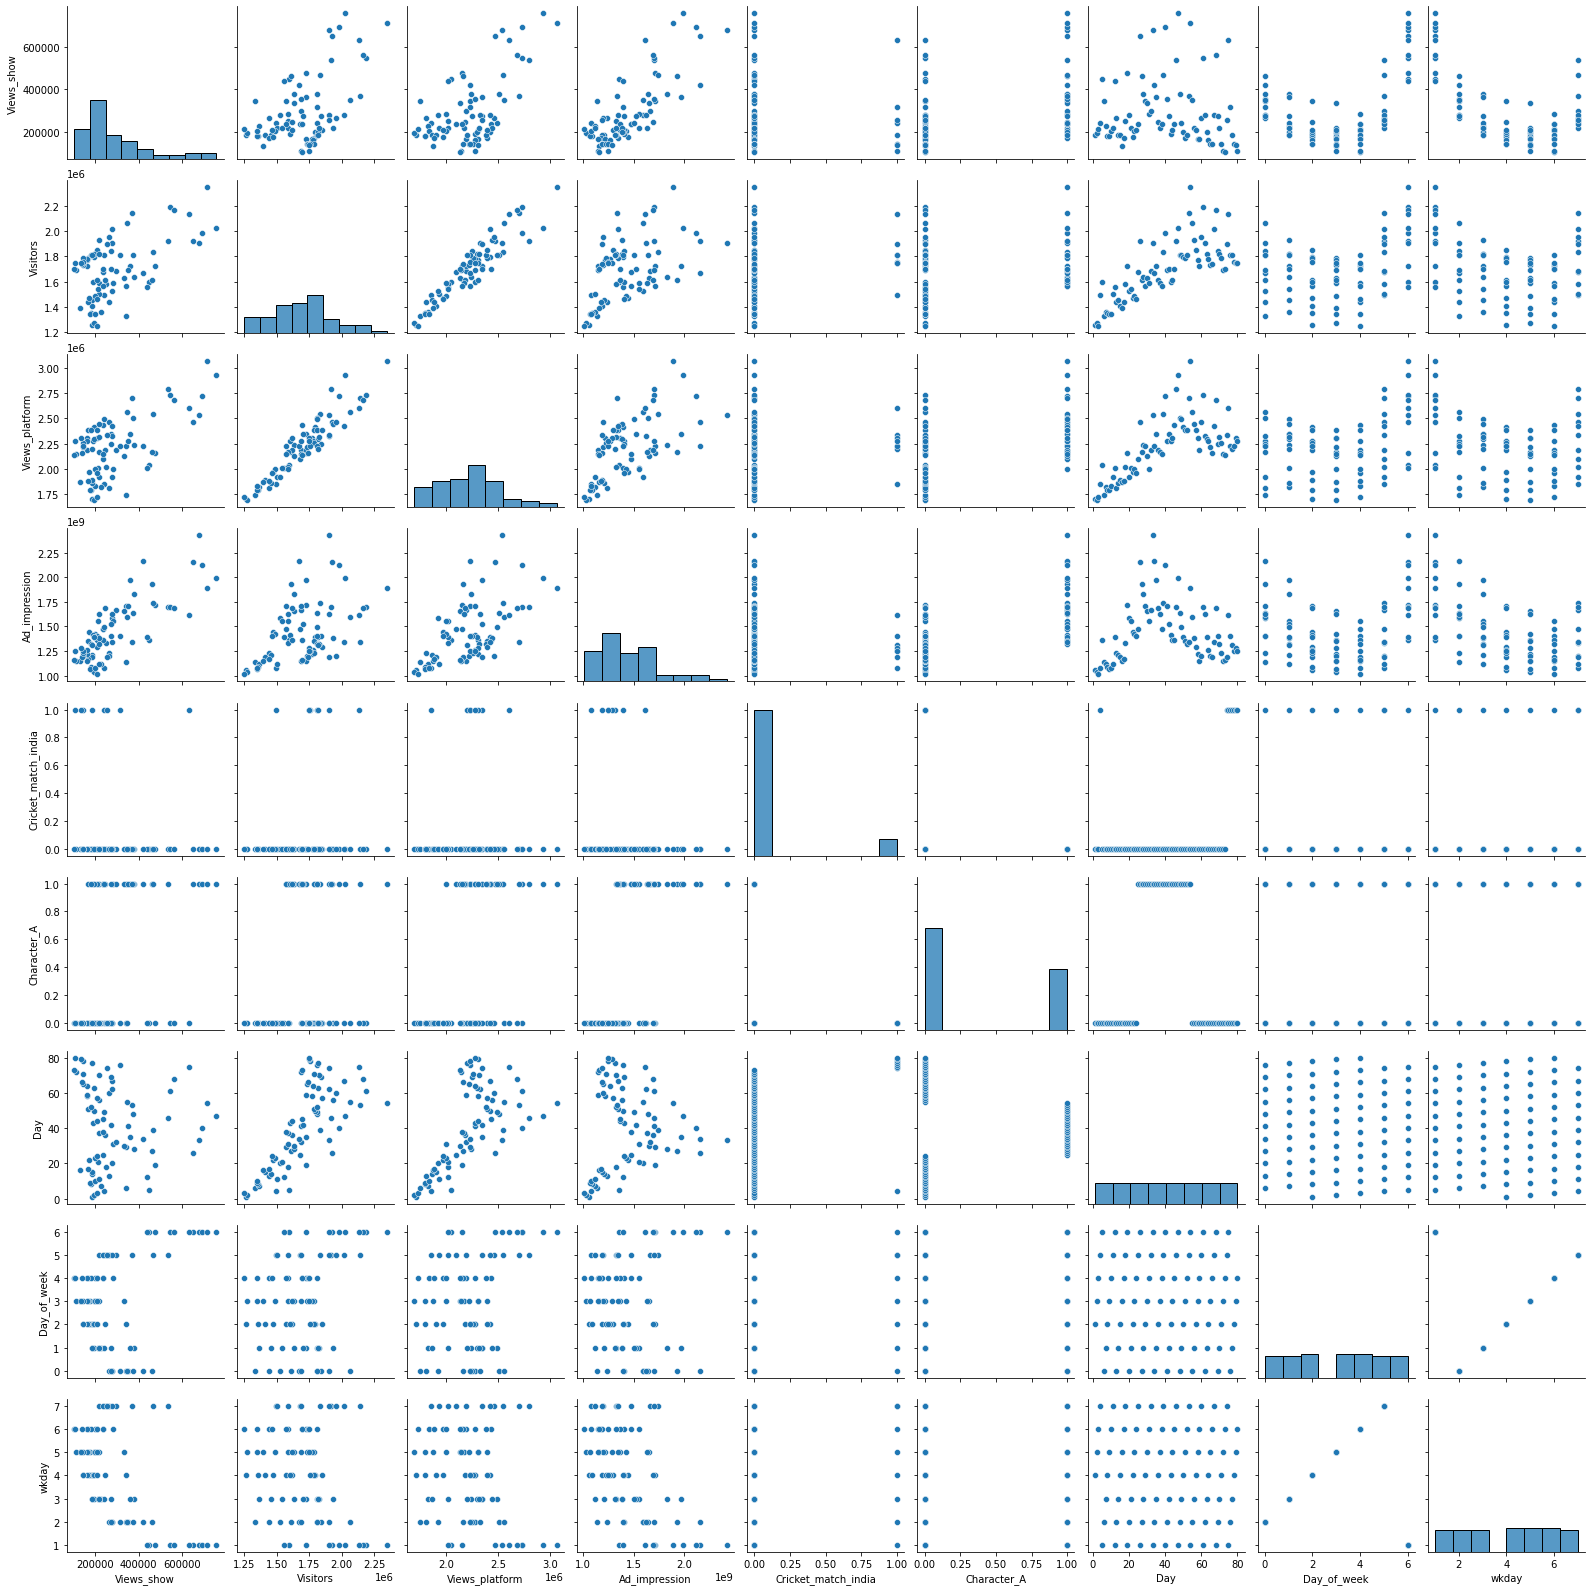

In [ ]:
sns.pairplot(data=media)

In [ ]:
#Linear regression model 1 (lm1)
X=media[['Visitors','weekend','Day_of_week']]
y=media['Views_show']

#2 ways to built - Linear Regression & StatsModel api
import statsmodels.api as sm

#Add Constant
X=sm.add_constant(X)
lm3=sm.OLS(y,X).fit()
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     27.27
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           4.47e-12
Time:                        05:43:13   Log-Likelihood:                -1039.8
No. Observations:                  80   AIC:                             2088.
Df Residuals:                      76   BIC:                             2097.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.962e+04   1.06e+05     -0.280      

In [ ]:
#convert Day_of_week, 1 = weekend, 0 = weekday
def weekend(i):
  if i==5: return 1
  elif i==6: return 1
  else: return 0
  return i

  media['weekend']=[weekend(i) for i in media['Day_of_week']]
  media['weekend']


In [ ]:
media['Day_of_week']

0     2
1     3
2     4
3     5
4     6
     ..
75    0
76    1
77    2
78    3
79    4
Name: Day_of_week, Length: 80, dtype: int64

In [ ]:
#Creation of lag variable
media['lag_views']=np.roll(media['Views_show'],1)

In [ ]:
media[['Views_show','lag_views']]

,Views_show,lag_views
0,183738,108961
1,193763,183738
2,210479,193763
3,240061,210479
4,446314,240061
...,...,...
75,313945,631962
76,185689,313945
77,142260,185689
78,135871,142260


In [ ]:
X=media[['Visitors','weekend','lag_views','Day_of_week']]
y=media['Views_show']

#2 ways to built - Linear Regression & StatsModel api
import statsmodels.api as sm

#Add Constant
X=sm.add_constant(X)
lm4=sm.OLS(y,X).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     71.07
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           9.38e-25
Time:                        06:01:35   Log-Likelihood:                -1006.4
No. Observations:                  80   AIC:                             2023.
Df Residuals:                      75   BIC:                             2035.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.05e+05   7.22e+04     -2.839      

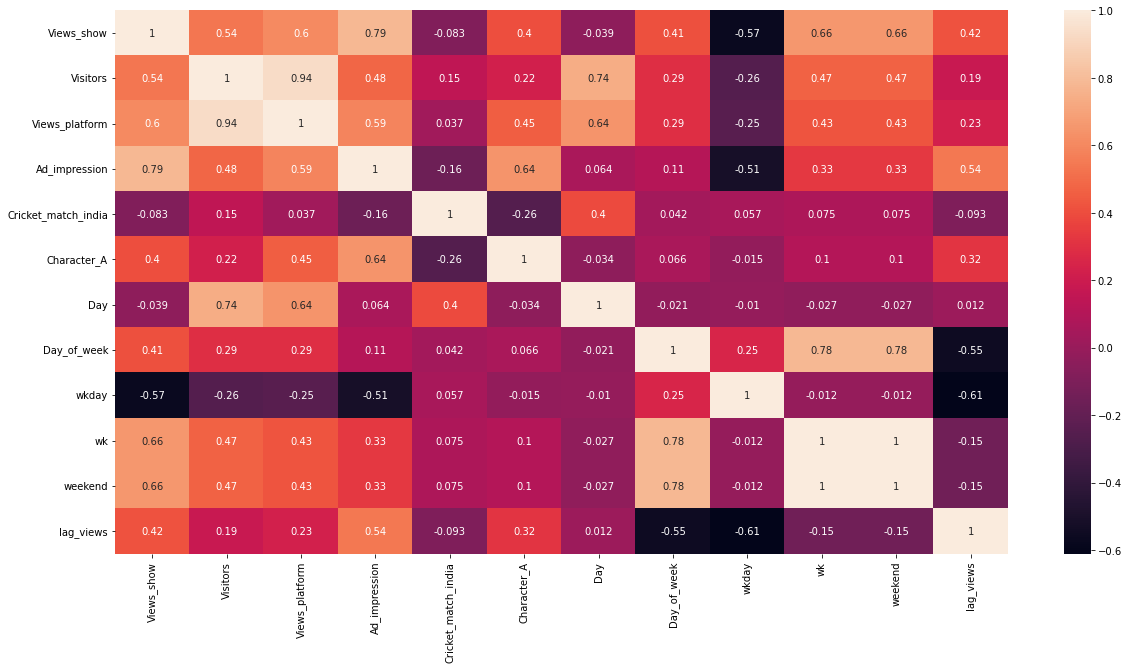

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(media.corr(),annot=True)

In [ ]:
X=media[['Views_platform','weekend','Character_A']]
y=media['Views_show']

#2 ways to built - Linear Regression & StatsModel api
import statsmodels.api as sm

#Add Constant
X=sm.add_constant(X)
lm5=sm.OLS(y,X).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           3.59e-15
Time:                        06:09:00   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

In [ ]:
X=media[['weekend','Character_A','Ad_impression']]
y=media['Views_show']

#2 ways to built - Linear Regression & StatsModel api
import statsmodels.api as sm

#Add Constant
X=sm.add_constant(X)
lm6=sm.OLS(y,X).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           1.05e-26
Time:                        06:13:11   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [ ]:
X=media[['Views_platform','weekend','Character_A','Ad_impression']]
y=media['Views_show']

#2 ways to built - Linear Regression & StatsModel api
import statsmodels.api as sm

#Add Constant
X=sm.add_constant(X)
lm7=sm.OLS(y,X).fit()
print(lm7.summary())

In [ ]:
X=media[['Views_platform','weekend','Character_A','Ad_impression','Cricket_match_india']]
y=media['Views_show']

#2 ways to built - Linear Regression & StatsModel api
import statsmodels.api as sm

#Add Constant
X=sm.add_constant(X)
lm7=sm.OLS(y,X).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     62.29
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           3.94e-25
Time:                        06:14:03   Log-Likelihood:                -1003.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      74   BIC:                             2032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -3.4e+05   7

In [ ]:
media['Ad_imm']=media['Ad_impression']/1000000

In [ ]:
X=media[['Views_platform','weekend','Character_A','Ad_imm','Cricket_match_india']]
y=media['Views_show']

#2 ways to built - Linear Regression & StatsModel api
import statsmodels.api as sm

#Add Constant
X=sm.add_constant(X)
lm8=sm.OLS(y,X).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     62.29
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           3.94e-25
Time:                        06:23:54   Log-Likelihood:                -1003.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      74   BIC:                             2032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -3.4e+05   7

In [ ]:
#lm8 gives high correlation also can be used for fur analysis

In [ ]:
X=media[['weekend','Character_A','Ad_imm']]
X=sm.add_constant(X)
Predicted_views=lm8.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(media.Views_show,Predicted_views)
rsq=r2_score(media.Views_show,Predicted_views)
print("MSE:",mse)
print("rsq:",mse)


MSE: 4677651616.2534075
rsq: 4677651616.2534075


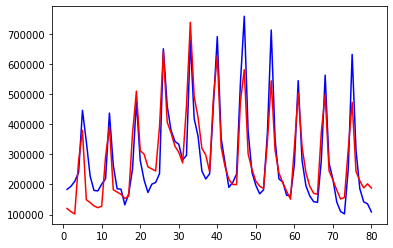

In [ ]:
#plot predicted vs actual
c=media['Day']
fig=plt.figure()
plt.plot(c,media.Views_show,color="blue")
plt.plot(c,Predicted_views,color="red")